In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [14]:
# Función polinómica de grado 3: 2 * x**3 - 3 * x**2 + 5 * x + 3
def polynomial_function(x):
    return np.polyval([2, -3, 5, 3], x)

def polynomial_function_u(x,coefficients):
   return np.polyval(coefficients, x)

# Derivada de la función polinómica
def gradient(x):
    return np.polyval([6, -6, 5], x)

In [64]:

#evitar que revienten los gradientes por overflowing, usando un valor max para clipping
#valor escojido de manera arbitraria, después de diversas iteraciones 0.5 es el mejor hallado
'''
se inició coon 1/8 de un valor máximo de un float 
a medida de aumentar las iteraciones fue reducido hasta un valor donde los fits no quedaran muy alejados
si , fue realizado a mano cada iteracion. 
'''
clipmax = 0.5
# Función para el descenso de gradiente estocástico
def stochastic_gradient_descent(learning_rate, epochs, x_values, y_true):
    coefficients = np.random.uniform(-5, 5, 4)  # Inicializar coeficientes aleatoriamente
    for epoch in range(epochs):
        for i in range(len(x_values)):
            x = x_values[i]
            y_pred = polynomial_function_u(x, coefficients)
            error = y_pred - y_true[i]
            gradient_value = gradient(x) * error
            gradient_value = np.clip(gradient_value,-clipmax,clipmax)
            for j in range(len(coefficients)):
                coefficients[j] = coefficients[j] - learning_rate * gradient_value * x**(3-j)
    return coefficients

# Función para el descenso de gradiente
def gradient_descent(learning_rate, epochs, x_values, y_true):
    coefficients = np.random.uniform(-5, 5, 4)  # Inicializar coeficientes aleatoriamente
    for epoch in range(epochs):
        y_pred = polynomial_function_u(x_values, coefficients)
        error = y_pred - y_true
        gradient_value = np.mean(gradient(x_values) * error[:, np.newaxis], axis=0)
        gradient_value = np.clip(gradient_value,-clipmax,clipmax)
        for j in range(len(coefficients)):
            coefficients[j] = coefficients[j] - learning_rate * gradient_value[j]
    return coefficients

# Función para el descenso de gradiente por mini-batches
def mini_batch_gradient_descent(learning_rate, epochs, batch_size, x_values, y_true):
    coefficients = np.random.uniform(-5, 5, 4)  # Inicializar coeficientes aleatoriamente
    for epoch in range(epochs):
        for i in range(0, len(x_values), batch_size):
            x_batch = x_values[i:i+batch_size]
            y_true_batch = y_true[i:i+batch_size]
            y_pred = polynomial_function_u(x_batch, coefficients)
            error = y_pred - y_true_batch
            gradient_value = np.mean(gradient(x_batch) * error[:, np.newaxis], axis=0)
            gradient_value = np.clip(gradient_value,-clipmax,clipmax)
            for j in range(len(coefficients)):
                coefficients[j] = coefficients[j] - learning_rate * gradient_value[j]
    return coefficients


In [4]:
# Función para calcular el fitness numéricamente (MSE)
def calculate_fitness(coefficients, x_values, y_true):
    y_predicted = np.polyval(coefficients, x_values)
    n = len(x_values)
    mse = np.sum((y_predicted - y_true)**2) / n
    return mse

# Función para calcular R-squared
def calculate_r_squared(coefficients, x_values, y_true):
    y_predicted = np.polyval(coefficients, x_values)
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_predicted)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared


In [18]:
# Datos de entrada
x_values = np.linspace(-5, 5, 100)
y_true = polynomial_function(x_values)
learning_rate = 0.0015
epochs = 1000



In [65]:
# Descenso de gradiente estocástico

start_time = time.time()
coefficients_sgd = stochastic_gradient_descent(learning_rate, epochs, x_values, y_true)
sgd_time = time.time() - start_time
fitness_sgd = calculate_fitness(coefficients_sgd, x_values, y_true)

# Descenso de gradiente
start_time = time.time()
coefficients_gd = gradient_descent(learning_rate, epochs, x_values, y_true)
gd_time = time.time() - start_time
fitness_gd = calculate_fitness(coefficients_gd, x_values, y_true)

# Descenso de gradiente por mini lotes
start_time = time.time()
coefficients_mbgd = mini_batch_gradient_descent(learning_rate, epochs, 10, x_values, y_true)
mbgd_time = time.time() - start_time
fitness_mbgd = calculate_fitness(coefficients_mbgd, x_values, y_true)

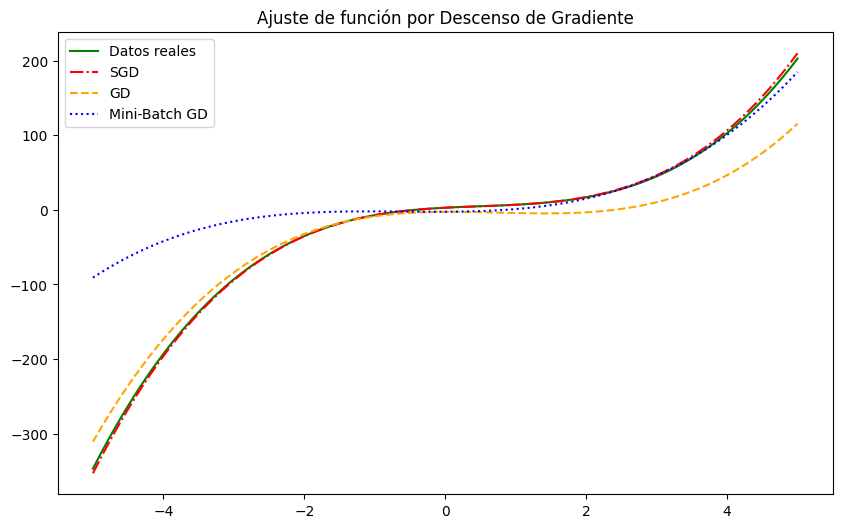

In [84]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_true, label='Datos reales', color='green')
plt.plot(x_values, np.polyval(coefficients_sgd.tolist(), x_values), label='SGD', color='red',ls='-.')
plt.plot(x_values, np.polyval(coefficients_gd, x_values), label='GD', color='orange',ls='--')
plt.plot(x_values, np.polyval(coefficients_mbgd, x_values), label='Mini-Batch GD', color='blue',ls=':')
plt.ticklabel_format(style='scientific', axis='y')
plt.title('Ajuste de función por Descenso de Gradiente')
plt.legend()
plt.show()

In [85]:
# Mostrar resultados numéricos de tiempo y fitness
print("Results")
print(f'Tiempo de ejecución SGD: {sgd_time} segundos')
print(f'Tiempo de ejecución GD: {gd_time} segundos')
print(f'Tiempo de ejecución Mini-Batch GD: {mbgd_time} segundos')

print("\n---------------------------------------------\n")
print(f'Fitness SGD: MSE {fitness_sgd}')
print(f'Fitness GD: MSE {fitness_gd}')
print(f'Fitness Mini-Batch GD: MSE {fitness_mbgd}')
print("\n---------------------------------------------\n")
# Calculate R-squared for each method
r_squared_sgd = calculate_r_squared(coefficients_sgd, x_values, y_true)
r_squared_gd = calculate_r_squared(coefficients_gd, x_values, y_true)
r_squared_mbgd = calculate_r_squared(coefficients_mbgd, x_values, y_true)

# Print R-squared values
print(f'R-squared SGD: {r_squared_sgd}')
print(f'R-squared GD: {r_squared_gd}')
print(f'R-squared Mini-Batch GD: {r_squared_mbgd}')

Results
Tiempo de ejecución SGD: 2.115661859512329 segundos
Tiempo de ejecución GD: 0.05700087547302246 segundos
Tiempo de ejecución Mini-Batch GD: 0.40843796730041504 segundos

---------------------------------------------

Fitness SGD: MSE 6.666719108180969
Fitness GD: MSE 960.8455537831353
Fitness Mini-Batch GD: MSE 6038.965198326815

---------------------------------------------

R-squared SGD: 0.9994796254478551
R-squared GD: 0.9250006537523427
R-squared Mini-Batch GD: 0.528625136367036
